<a href="https://colab.research.google.com/github/my-quach/R-AI/blob/main/B%C3%A0i_2_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Đường dẫn chứa thư mục
data_path = '/content/drive/MyDrive/logistic'

# 1. Data augmentation và chia train/val
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=5,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# 2. Mô hình CNN
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Callbacks: EarlyStopping + ModelCheckpoint
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]

# 4. Hàm phát hiện mã QR và gán nhãn "không đạt" nếu không có mã QR
def detect_qr_and_predict(image):
    qr_detector = cv2.QRCodeDetector()
    retval, points = qr_detector.detect(image)

    if not retval:
        # Không phát hiện mã QR, gán nhãn không đạt
        return 0

    # Nếu phát hiện mã QR, đưa ảnh vào mô hình để phân loại
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    image = image.reshape(1, 224, 224, 3)

    prediction = model.predict(image)
    return prediction[0][0]



Found 98 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [13]:
# 4. Huấn luyện mô hình
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,
    callbacks=callbacks,
    verbose=1
)

# 5. Đánh giá mô hình sau khi huấn luyện
loss, acc = model.evaluate(val_generator, verbose=0)
print(f'Validation accuracy: {acc:.4f}')

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 542ms/step - accuracy: 0.3997 - loss: 0.5654 - val_accuracy: 0.4167 - val_loss: 0.6925
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 648ms/step - accuracy: 0.5186 - loss: 0.5624 - val_accuracy: 0.4167 - val_loss: 0.8351
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 564ms/step - accuracy: 0.4120 - loss: 0.9634 - val_accuracy: 0.4167 - val_loss: 0.6416
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 505ms/step - accuracy: 0.4562 - loss: 0.4214 - val_accuracy: 0.4167 - val_loss: 0.7386
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 527ms/step - accuracy: 0.4667 - loss: 0.1439 - val_accuracy: 0.4167 - val_loss: 0.8741
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 698ms/step - accuracy: 0.4925 - loss: 0.4648 - val_accuracy: 0.4167 - val_loss: 1.4082
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step - accuracy: 0.6362 - loss: 0.0999 - val_accuracy: 0.4167 - val_loss: 4.3749
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 659ms/step - accuracy: 0.4386 - loss: -1.6084 - val_

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load mô hình đã huấn luyện
model = load_model('/content/drive/MyDrive/logistic/logistic_updat2_model.h5')

# 4. Hàm để phát hiện mã QR và gán nhãn "không đạt" nếu không có mã QR
def detect_qr_and_predict(image):
    qr_detector = cv2.QRCodeDetector()
    retval, points = qr_detector.detect(image)

    if not retval:
        # Không phát hiện mã QR, gán nhãn không đạt
        return 0

    # Nếu phát hiện mã QR, đưa ảnh vào mô hình để phân loại
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    image = image.reshape(1, 224, 224, 3)

    prediction = model.predict(image)
    return prediction[0][0]

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '//content/drive/MyDrive/logistic',
    target_size=(224, 224),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)
loss, acc = model.evaluate(test_generator)
print("Accuracy:", acc)


Found 122 images belonging to 3 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.6530 - loss: 0.5774
Accuracy: 0.5327869057655334


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Dự đoán: ✅ ĐẠT YÊU CẦU - Xác suất: 0.8446374


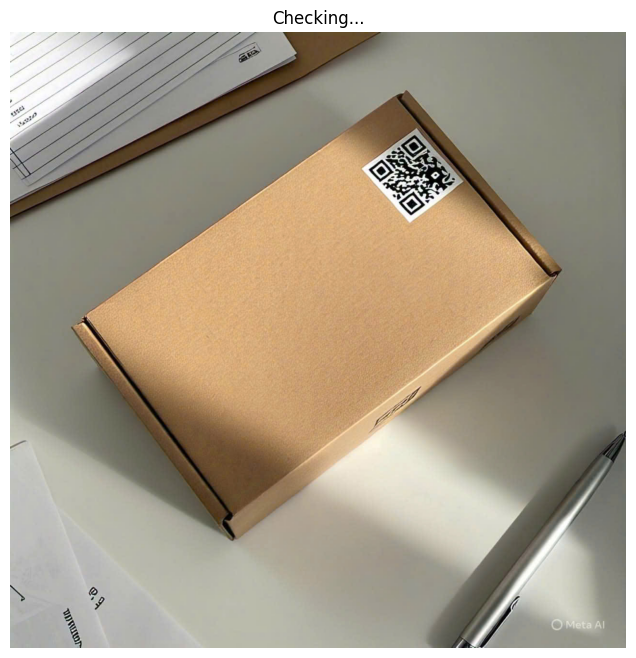

In [26]:
import cv2
import matplotlib.pyplot as plt

# 5. Kiểm tra
image_path = '/content/drive/MyDrive/logistic/test/z6556320588766_fd870c8683a44e1e3cd5b970c80b24ec.jpg'  # Thay bằng đường dẫn thực tế
image = cv2.imread(image_path)

prediction = detect_qr_and_predict(image)

if prediction == 0:
     print("Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất:", prediction)
else:
    print("Dự đoán: ✅ ĐẠT YÊU CẦU - Xác suất:", prediction)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Checking...")
plt.show()


Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất: 0


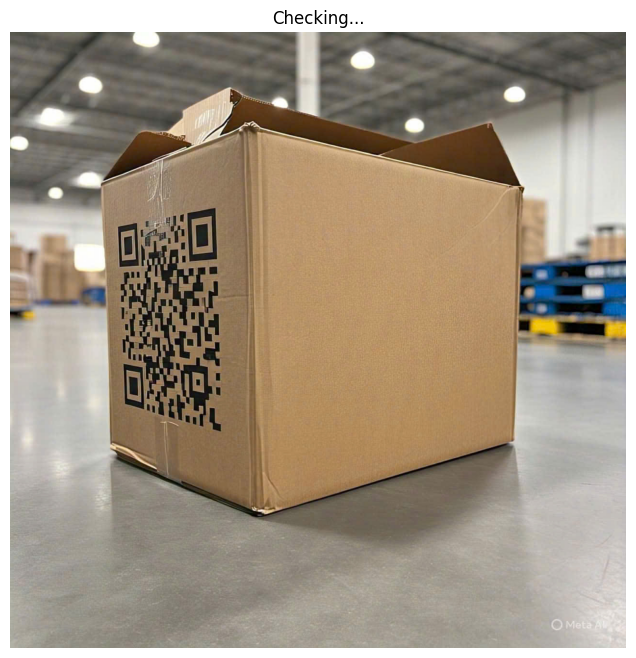

In [27]:
import cv2
import matplotlib.pyplot as plt

# 5. Kiểm tra
image_path = '/content/drive/MyDrive/logistic/LOAI/z6559587425530_0c15f5a8ed4150de879fd05061ec6be9.jpg'  # Thay bằng đường dẫn thực tế
image = cv2.imread(image_path)

prediction = detect_qr_and_predict(image)

if prediction == 0:
     print("Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất:", prediction)
else:
    print("Dự đoán: ✅ ĐẠT YÊU CẦU - Xác suất:", prediction)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Checking...")
plt.show()


Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất: 0


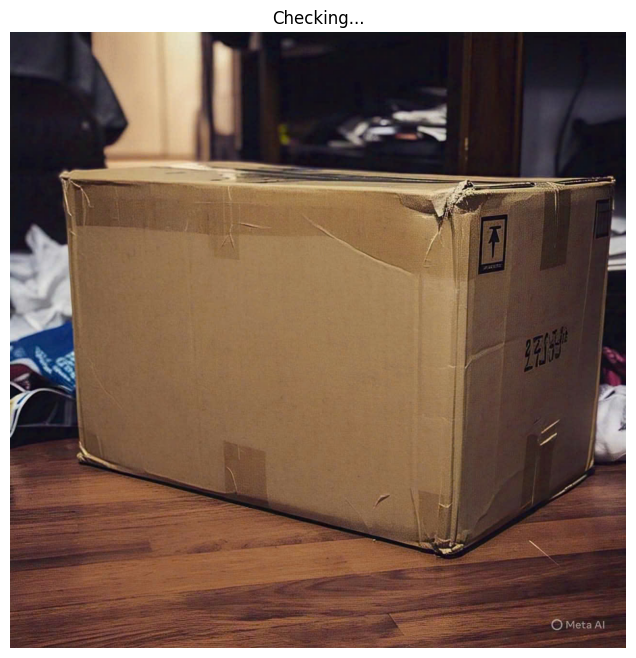

In [25]:
import cv2
import matplotlib.pyplot as plt

# 5. Kiểm tra
image_path = '/content/drive/MyDrive/logistic/test/Bản sao của z6556346825545_adfdd19f533074227316c114bb7f1d75.jpg'  # Thay bằng đường dẫn thực tế
image = cv2.imread(image_path)

prediction = detect_qr_and_predict(image)

if prediction == 0:
    print("Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất:", prediction)
else:
    print("Dự đoán: ✅ ĐẠT YÊU CẦU - Xác suất:", prediction)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Checking...")
plt.show()


Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất: 0


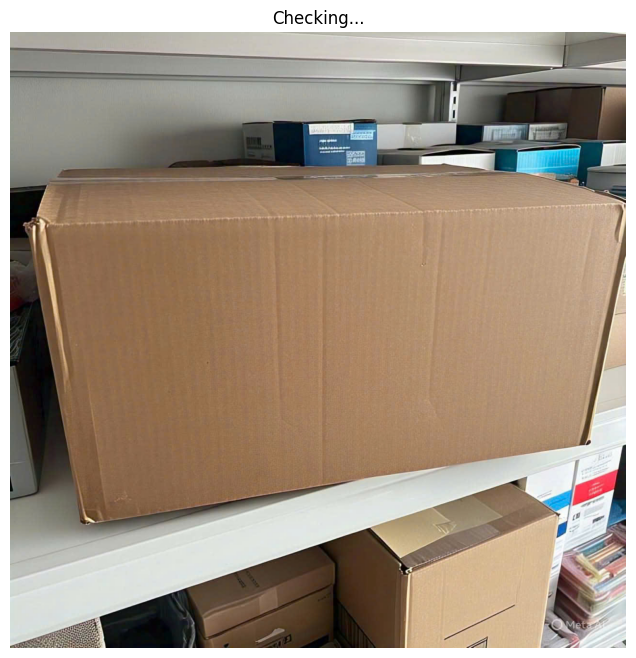

In [28]:
import cv2
import matplotlib.pyplot as plt

# 5. Kiểm tra
image_path = '/content/drive/MyDrive/logistic/test/Bản sao của z6556346835946_5d3bbb78be9c9f62d7ff973345e579f7.jpg'  # Thay bằng đường dẫn thực tế
image = cv2.imread(image_path)

prediction = detect_qr_and_predict(image)

if prediction == 0:
     print("Dự đoán: ❌ KHÔNG ĐẠT YÊU CẦU - Xác suất:", prediction)
else:
    print("Dự đoán: ✅ ĐẠT YÊU CẦU - Xác suất:", prediction)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Checking...")
plt.show()


In [18]:
!pip install streamlit pyngrok --quiet
!ngrok config add-authtoken '2wWa8mEA3DsBbDoSZgoxgZYPLhP_bn12tTUZAvA9rzXSDE24'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
!apt-get install -y libzbar0
!pip install pyzbar opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-double3
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x libfftw3-bin libfftw3-dev inkscape poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-

In [34]:
%%writefile app.py
from pyzbar.pyzbar import decode
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load mô hình đã huấn luyện
model = load_model('/content/best_model.h5')

# Hàm xử lý ảnh để đưa vào CNN
def preprocess_image(img):
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Hàm kiểm tra QR và phân loại bằng CNN
def detect_qr_and_predict(image):
    qr_detector = cv2.QRCodeDetector()
    retval, points = qr_detector.detect(image)

    if not retval:
        return 0.0  # Không có QR → KHÔNG ĐẠT

    # Có QR → phân loại bằng CNN
    processed_img = preprocess_image(image)
    prediction = model.predict(processed_img)[0][0]
    return prediction

# Giao diện Streamlit
st.title("📦 Phân loại hàng hóa:")

uploaded_file = st.file_uploader("🖼️ Tải lên ảnh hàng hóa cần kiểm tra", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Đọc ảnh bằng OpenCV
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)

    # Dự đoán
    prediction = detect_qr_and_predict(image)

    # Hiển thị kết quả
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    st.image(image_rgb, caption="Ảnh đã tải lên", use_column_width=True)

    if prediction == 0 or prediction < 0.5:
        st.error(f"❌ KHÔNG ĐẠT YÊU CẦU – Xác suất: {prediction:.2f}")
    else:
        st.success(f"✅ ĐẠT YÊU CẦU – Xác suất: {prediction:.2f}")


Overwriting app.py


In [35]:
from pyngrok import ngrok

# Mở đường hầm HTTP trên localhost:8501
public_url = ngrok.connect("http://localhost:8501")
print("🔗 Mở app tại:", public_url)

# Chạy Streamlit trong nền
!streamlit run app.py &

🔗 Mở app tại: NgrokTunnel: "https://2235-35-227-61-219.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.227.61.219:8501

2025-05-04 06:07:15.901397: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746338835.929322   14185 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746338835.937601   14185 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 06:07:21.765706: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: U